In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from data import get_pert_data

os.chdir('..')

def jaccard_similarity(list1, list2):
    """
    Compute the Jaccard similarity between two lists.
    """
    set1 = set(list1)
    set2 = set(list2)
    return len(set1.intersection(set2)) / len(set1.union(set2))


def get_topk_de_gene_ids(ctrl, post, k=20):
    """
    Get the top k differentially expressed genes from the results.
    """
    # Get the top k differentially expressed genes
    diff = post - ctrl
    diff_genes_ids = np.argsort(np.abs(diff))[-k:]
    return diff_genes_ids

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 117/117 [00:00<00:00, 1330.23it/s]

jaccard similarity:  0.21037236611380877


(array([ 5., 24., 25., 21., 13., 18.,  5.,  2.,  2.,  2.]),
 array([0.02564103, 0.07692308, 0.12820513, 0.17948718, 0.23076923,
        0.28205128, 0.33333333, 0.38461538, 0.43589744, 0.48717949,
        0.53846154]),
 <BarContainer object of 10 artists>)

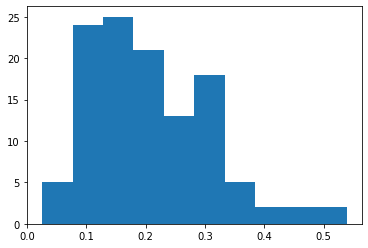

In [2]:
n_train = None
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_nonctl-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_nonctl-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 117/117 [00:00<00:00, 1274.07it/s]

jaccard similarity:  0.3177507792505231


(array([ 6., 15., 24.,  8., 19., 10.,  8.,  8., 15.,  4.]),
 array([0.02564103, 0.08974359, 0.15384615, 0.21794872, 0.28205128,
        0.34615385, 0.41025641, 0.47435897, 0.53846154, 0.6025641 ,
        0.66666667]),
 <BarContainer object of 10 artists>)

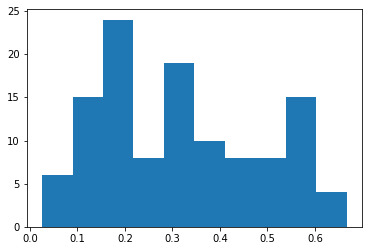

In [3]:
n_train = None
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_matching-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_matching-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)

### 1-gene

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 47/47 [00:00<00:00, 1238.60it/s]

jaccard similarity:  0.19857421150941337


(array([ 3.,  9., 12.,  8.,  4.,  8.,  2.,  0.,  0.,  1.]),
 array([0.02564103, 0.07692308, 0.12820513, 0.17948718, 0.23076923,
        0.28205128, 0.33333333, 0.38461538, 0.43589744, 0.48717949,
        0.53846154]),
 <BarContainer object of 10 artists>)

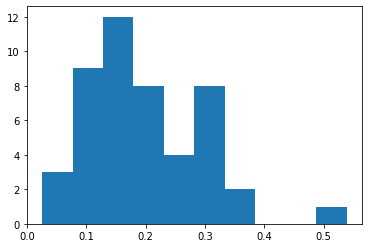

In [4]:
n_train = 1
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_nonctl-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_nonctl-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 47/47 [00:00<00:00, 1215.48it/s]

jaccard similarity:  0.36920848109472365


(array([1., 4., 8., 0., 9., 4., 5., 6., 9., 1.]),
 array([0.02564103, 0.08974359, 0.15384615, 0.21794872, 0.28205128,
        0.34615385, 0.41025641, 0.47435897, 0.53846154, 0.6025641 ,
        0.66666667]),
 <BarContainer object of 10 artists>)

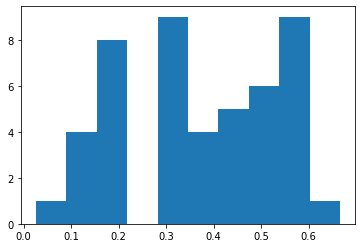

In [5]:
n_train = 1
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_matching-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_matching-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)

### 2-gene

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 13/13 [00:00<00:00, 1285.20it/s]

jaccard similarity:  0.16374969173830653


(array([1., 4., 2., 0., 2., 0., 2., 0., 1., 1.]),
 array([0.08108108, 0.10200523, 0.12292938, 0.14385353, 0.16477768,
        0.18570183, 0.20662598, 0.22755013, 0.24847428, 0.26939843,
        0.29032258]),
 <BarContainer object of 10 artists>)

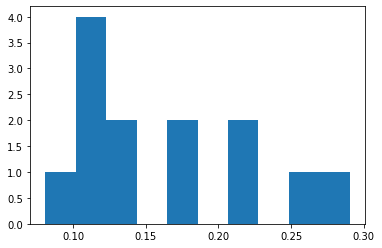

In [6]:
n_train = 2
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_nonctl-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_nonctl-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)

Found local copy...
Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['RHOXF2BB+ctrl' 'LYL1+IER5L' 'ctrl+IER5L' 'KIAA1804+ctrl' 'IER5L+ctrl'
 'RHOXF2BB+ZBTB25' 'RHOXF2BB+SET']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:10
combo_seen1:48
combo_seen2:18
unseen_single:41
Done!


here1


100%|██████████| 13/13 [00:00<00:00, 1319.54it/s]

jaccard similarity:  0.5132468968526126


(array([1., 0., 3., 1., 0., 0., 3., 0., 2., 3.]),
 array([0.29032258, 0.32795699, 0.3655914 , 0.40322581, 0.44086022,
        0.47849462, 0.51612903, 0.55376344, 0.59139785, 0.62903226,
        0.66666667]),
 <BarContainer object of 10 artists>)

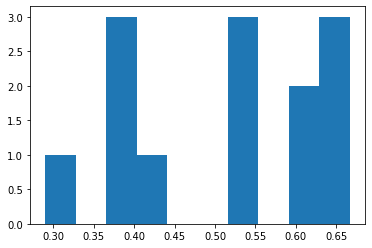

In [7]:
n_train = 2
pert_data = get_pert_data(dataset="Norman2019", seed=0)

# Split train and test
test_adata = pert_data.adata[pert_data.adata.obs["split"] == "test"]
train_adata = pert_data.adata[pert_data.adata.obs["split"] == "train"]

# Get control mean, non control mean (pert_mean), and non control mean differential
control_adata = train_adata[train_adata.obs["control"] == 1]
pert_adata = train_adata[train_adata.obs["control"] == 0]
control_mean = np.array(control_adata.X.mean(axis=0))[0]

# Load the baseline results
gt = pd.read_csv("results/Norman2019_0_matching-mean_post-gt.csv")
pred = pd.read_csv("results/Norman2019_0_matching-mean_post-pred.csv")

if n_train is not None:
    gt = gt[gt["n_train"] == n_train]
    pred = pred[pred["n_train"] == n_train]

post_gt = gt.drop(columns=["condition", "n_train"], inplace=False).to_numpy()
post_pred = pred.drop(columns=["condition", "n_train"], inplace=False).to_numpy()

jaccard, pearson = [], []
for i in tqdm(range(post_gt.shape[0])):
    true_de_ids = get_topk_de_gene_ids(control_mean, post_gt[i], k=20)
    pred_de_ids = get_topk_de_gene_ids(control_mean, post_pred[i], k=20)
    jaccard.append(jaccard_similarity(true_de_ids, pred_de_ids))

print("jaccard similarity: ", np.mean(jaccard))
# plot histogram of jaccard similarity
plt.hist(jaccard, bins=10)